In [1]:
# Loading libraries
import datetime as dt
from datetime import timedelta
from statistics import mean
import random
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
# STEP 1
# Creating a list of assets:
my_tickers_1 = ["META", "CROX", "AMZN", "OXY", "NFLX", "DECK", "URI"]
my_tickers_1 = sorted(my_tickers_1, reverse=False)  # Sorting alphabetically

start_date = dt.datetime.today() - dt.timedelta(days=720)
end_date = dt.datetime.today()

In [2]:
## Now downloading the data using the above variables
my_port = yf.download(start=start_date, end=end_date, tickers=my_tickers_1)
my_port  # Visualizing stock data

[*********************100%***********************]  7 of 7 completed


Adj Close                                                  \
                  AMZN        CROX        DECK        META        NFLX   
Date                                                                     
2022-04-11  151.121994   71.570000  260.359985  216.230576  348.000000   
2022-04-12  150.787506   71.970001  265.350006  213.913040  344.100006   
2022-04-13  155.541000   73.970001  271.829987  214.762146  350.429993   
2022-04-14  151.706497   72.320000  271.239990  209.957230  341.130005   
2022-04-18  152.785004   73.000000  270.980011  210.546616  337.859985   
...                ...         ...         ...         ...         ...   
2024-03-22  178.869995  141.619995  922.440002  509.579987  628.010010   
2024-03-25  179.710007  141.250000  932.590027  503.019989  627.460022   
2024-03-26  178.300003  140.050003  937.450012  495.890015  629.239990   
2024-03-27  179.830002  143.020004  937.900024  493.859985  613.530029   
2024-03-28  180.380005  143.800003  941.260010  485.579987  607.330017   

                                        Close                          ...  \
                  OXY         URI        AMZN        CROX        DECK  ...   
Date                                                                   ...   
2022-04-11  56.694054  310.857391  151.121994   71.570000  260.359985  ...   
2022-04-12  57.888226  313.581970  150.787506   71.970001  265.350006  ...   
2022-04-13  58.358082  319.434601  155.541000   73.970001  271.829987  ...   
2022-04-14  58.084000  325.651154  151.706497   72.320000  271.239990  ...   
2022-04-18  60.071037  333.992401  152.785004   73.000000  270.980011  ...   
...               ...         ...         ...         ...         ...  ...   
2024-03-22  63.810001  714.270020  178.869995  141.619995  922.440002  ...   
2024-03-25  64.550003  704.440002  179.710007  141.250000  932.590027  ...   
2024-03-26  63.320000  704.809998  178.300003  140.050003  937.450012  ...   
2024-03-27  64.199997  720.150024  179.830002  143.020004  937.900024  ...   
2024-03-28  64.989998  721.109985  180.380005  143.800003  941.260010  ...   

                  Open                           Volume                   \
                  NFLX        OXY         URI      AMZN     CROX    DECK   
Date                                                                       
2022-04-11  350.000000  60.549999  314.049988  52112000  1203300  269200   
2022-04-12  355.910004  58.990002  318.750000  55178000  1279200  377500   
2022-04-13  343.920013  60.000000  319.609985  53390000  1076800  317100   
2022-04-14  350.950012  59.230000  326.119995  51598000   898000  333800   
2022-04-18  340.000000  60.209999  330.000000  46514000   893000  282100   
...                ...        ...         ...       ...      ...     ...   
2024-03-22  624.159973  64.000000  724.280029  27964100  1109700  462600   
2024-03-25  627.900024  64.089996  711.059998  29815500  1070800  374800   
2024-03-26  625.200012  64.629997  706.460022  29659000  1023100  443700   
2024-03-27  629.010010  63.090000  709.400024  33272600  1015500  364200   
2024-03-28  614.989990  64.669998  720.440002  38051600   800000  245200   

                                                 
                META     NFLX       OXY     URI  
Date                                             
2022-04-11  20516600  3777100  27618000  632500  
2022-04-12  20128800  3824300  26820900  538400  
2022-04-13  19231800  3231000  21358400  370800  
2022-04-14  18379500  4343800  18789400  526300  
2022-04-18  16580800  5105000  30802500  679700  
...              ...      ...       ...     ...  
2024-03-22   8117000  2134100   4927200  445500  
2024-03-25   8380600  1803300   6921300  423900  
2024-03-26  11205400  2804500   6182700  440200  
2024-03-27   9989700  2628300   5725700  257100  
2024-03-28  15212800  3708800   7159600  440200  

[494 rows x 42 columns]

In [3]:
# Step 2
# Only tracking the Adj Close values for each stock and dropping NAN values.
my_port = my_port["Adj Close"].dropna()
my_port

,AMZN,CROX,DECK,META,NFLX,OXY,URI
Date,,,,,,,
2022-04-11,151.121994,71.570000,260.359985,216.230576,348.000000,56.694054,310.857391
2022-04-12,150.787506,71.970001,265.350006,213.913040,344.100006,57.888226,313.581970
2022-04-13,155.541000,73.970001,271.829987,214.762146,350.429993,58.358082,319.434601
2022-04-14,151.706497,72.320000,271.239990,209.957230,341.130005,58.084000,325.651154
2022-04-18,152.785004,73.000000,270.980011,210.546616,337.859985,60.071037,333.992401
...,...,...,...,...,...,...,...
2024-03-22,178.869995,141.619995,922.440002,509.579987,628.010010,63.810001,714.270020
2024-03-25,179.710007,141.250000,932.590027,503.019989,627.460022,64.550003,704.440002
2024-03-26,178.300003,140.050003,937.450012,495.890015,629.239990,63.320000,704.809998


In [4]:
my_port = my_port.pct_change().dropna() # Data in terms of percent change
my_port

,AMZN,CROX,DECK,META,NFLX,OXY,URI
Date,,,,,,,
2022-04-12,-0.002213,0.005589,0.019166,-0.010718,-0.011207,0.021063,0.008765
2022-04-13,0.031524,0.027789,0.024421,0.003969,0.018396,0.008117,0.018664
2022-04-14,-0.024653,-0.022306,-0.002170,-0.022373,-0.026539,-0.004697,0.019461
2022-04-18,0.007109,0.009403,-0.000958,0.002807,-0.009586,0.034210,0.025614
2022-04-19,0.034889,0.064384,0.071518,0.031029,0.031818,-0.016132,0.035135
...,...,...,...,...,...,...,...
2024-03-22,0.004042,0.004397,-0.032006,0.003584,0.008511,-0.001877,-0.006648
2024-03-25,0.004696,-0.002613,0.011003,-0.012873,-0.000876,0.011597,-0.013762
2024-03-26,-0.007846,-0.008496,0.005211,-0.014174,0.002837,-0.019055,0.000525


**Creating a class for calculating Mean, Variance, and Correlation Matrix**

In [5]:
class Operations:
    def __init__(self, values):
        self.values = values
    
    def stats(self,column):
        avg = self.values[column].mean() # Calculating mean
        variance = self.values[column].var() # Calculating variance
        table = pd.DataFrame({'Mean': avg, 'Variance': variance}) # Putting the values into a table
        return table
    def corrmatrix(self):
        correlation_matrix = self.values.corr(method='pearson') # Calculating correlation matrix of our dataframe with the pearson method.
        return correlation_matrix

In [6]:
# Displaying the Mean and Variance
d=Operations(my_port)
d.stats(my_tickers_1)

,Mean,Variance
AMZN,0.000680,0.000641
CROX,0.002112,0.001401
DECK,0.002909,0.000613
META,0.002160,0.001045
NFLX,0.001704,0.001082
OXY,0.000539,0.000524
URI,0.002013,0.000613


In [7]:
# Calculating the Correlation Matrix
correlation=d.corrmatrix()
correlation

,AMZN,CROX,DECK,META,NFLX,OXY,URI
AMZN,1.000000,0.439754,0.541860,0.616387,0.498677,0.232864,0.426082
CROX,0.439754,1.000000,0.560999,0.305098,0.358179,0.285699,0.507156
DECK,0.541860,0.560999,1.000000,0.404616,0.313982,0.208547,0.427913
META,0.616387,0.305098,0.404616,1.000000,0.481213,0.144839,0.333534
NFLX,0.498677,0.358179,0.313982,0.481213,1.000000,0.172705,0.320379
OXY,0.232864,0.285699,0.208547,0.144839,0.172705,1.000000,0.374250
URI,0.426082,0.507156,0.427913,0.333534,0.320379,0.374250,1.000000


<AxesSubplot:>

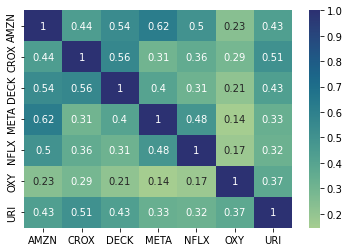

In [8]:
# Plotting using Seaborn Library
sns.heatmap(correlation,annot=True, cmap='crest')


**Calculating Efficient Frontier Using Monte Carlo Simulations**

In [9]:
# Defining functions to calculate annual returns and annual volatility with an input of a vector of weights.
def annual_return(weights): # Calculates annual weighted return from all the stocks
    returns = np.dot((my_port.mean()),weights) * 252
    return returns
def annual_volatility(weights): # Calculates annualized volatility from all the stocks
    volatility = np.dot((my_port.std()),weights) * np.sqrt(252)
    return volatility

In [10]:
# Using random weights
n = 10000 # number of iterations
risk_free_rate = 0.043; # 4.3 % from a quick google search. 
AR = [] # Annual return empty list
AV = [] # Annual volatility empty list
weights1 = [] # empty list of weights
weights2 = [] # empty list of weights
for i in range(1,n+1):
    for j in range(1,8):
        weights1.append(random.random()) # Appending random number to the list for plotting
   
    normalization = sum(weights1) # All weights need to sum to 1    
    weights1 = [num / normalization for num in weights1] # Dividing by normalization constant   
    weights2.append(weights1) # Appending weights to another list. Used for showing optimal parameters.
    AR.append(annual_return(weights1)) # Evaluating the function for the randomized weight
    AV.append(annual_volatility(weights1)) # Evaluating the function for the randomized weight
    weights1 = [] # Reinitializing
AR = np.array(AR)  # Converting to array for plotting  
AV = np.array(AV)  
sharpe_ratio = (AR-risk_free_rate)/AV



**Plotting Monte Carlo Simulation**

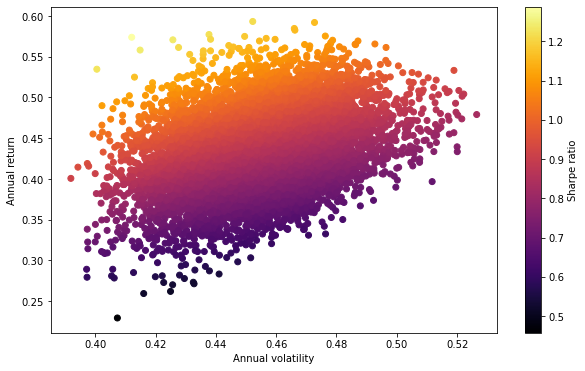

In [11]:
plt.figure(figsize=(10,6 ))
plt.scatter(AV, AR, c = sharpe_ratio, cmap='inferno')
plt.xlabel('Annual volatility')
plt.ylabel('Annual return')
plt.colorbar(label='Sharpe ratio');
# Values seem high for annual volatility and annual return.

**Optimal Parameters**

In [12]:
# I'm assuming optimal parameters refers to parameters resulting in two scenarios: Lowest Volatility OR Highest Return

In [13]:
# Lowest Volatility
min_AV = np.min(AV) # Finding minimum annual volatility
min_index_AV = np.argmin(AV) # Finding index of minimum annual volatility
list_weights = weights2[min_index_AV]
my_tickers_2 = ["META's Weight", "CROX's Weight", "AMZN's Weight", "OXY's Weight", "NFLX's Weight", "DECK's Weight", "URI's Weight"]
my_tickers_2 = sorted(my_tickers_2, reverse=False)  # Sorting alphabetically
row_names= ["Sharpe Ratio","Annual Returns","Annual Volatility"]
row_names.extend(my_tickers_2)
data = [sharpe_ratio[min_index_AV],AR[min_index_AV],min_AV]
data.extend(list_weights) # Combining two lists
# Create a DataFrame using the provided data and custom row names
table2 = pd.DataFrame(data, index=row_names)
table2

,0
Sharpe Ratio,0.912789
Annual Returns,0.400744
Annual Volatility,0.391924
AMZN's Weight,0.165063
CROX's Weight,0.005019
DECK's Weight,0.200373
META's Weight,0.027572
NFLX's Weight,0.006594
OXY's Weight,0.261022
URI's Weight,0.334357


In [18]:
# Highest Return
max_AR = np.max(AR) # Finding max annual return
max_index_AR = np.argmax(AR) # Finding index of max annual return
list_weights = weights2[max_index_AR]
my_tickers_2 = ["META's Weight", "CROX's Weight", "AMZN's Weight", "OXY's Weight", "NFLX's Weight", "DECK's Weight", "URI's Weight"]
my_tickers_2 = sorted(my_tickers_2, reverse=False)  # Sorting alphabetically
row_names= ["Sharpe Ratio","Annual Returns","Annual Volatility"]
row_names.extend(my_tickers_2)
data = [sharpe_ratio[max_index_AR],max_AR,AV[max_index_AR]]
data.extend(list_weights) # Combining two lists
# Create a DataFrame using the provided data and custom row names
table2 = pd.DataFrame(data, index=row_names)
table2

,0
Sharpe Ratio,1.216842
Annual Returns,0.593291
Annual Volatility,0.452229
AMZN's Weight,0.041925
CROX's Weight,0.003887
DECK's Weight,0.412768
META's Weight,0.413198
NFLX's Weight,0.066978
OXY's Weight,0.008988
URI's Weight,0.052256
